## PIPELINE
### 1. load model face_detection
### 2. extract embeddings from dataset
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

# PIPELINE: model 4, embeddings flag, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [16]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2
import pandas as pd
from retrieval import ImageRetrieval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [17]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [94]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 1506 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v2
Dataset dimension: 1506
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


In [95]:
emb_builder.features

,eye1,eye2,nose,mouth,head,image_path,label
0,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.1361273229122162, 0.2808919847011566, 0.27166229486465454, 0.35106325149536133)",2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b50.jpg,2
1,"(0.7478657364845276, 0.9559367895126343)","(0.7463187575340271, 0.6804515719413757)","(0.7093610763549805, 0.8535811305046082)","(0.6505976915359497, 0.8408597707748413)","(0.7984833717346191, 0.6680458188056946, 0.4021596908569336, 0.6628341674804688)",80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg,2
2,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.8873835802078247, 0.7991473078727722, 0.2227916717529297, 0.3851903975009918)",3683_png_jpg.rf.f1e0f73267c0f4c6a96ba03c90b14767.jpg,2
3,"(0.5331231355667114, 0.1431572586297989)","(0.37468722462654114, 0.1485910713672638)","(0.4571843147277832, 0.16346237063407898)","(0.4690818786621094, 0.2017134428024292)","(0.4624222218990326, 0.13126865029335022, 0.39902687072753906, 0.23249366879463196)",Nanit_21_JPG_jpg.rf.66d4221bcfa5fbe245a4cb9c9fcf2cb7.jpg,1
4,"(0.8597061038017273, 0.5980938673019409)","(0.8463156819343567, 0.7286936044692993)","(0.8270098567008972, 0.6580310463905334)","(0.7889798879623413, 0.6481287479400635)","(0.8659197092056274, 0.6576312780380249, 0.26434382796287537, 0.3245810568332672)",50_jpg.rf.93d6c51bfd14a04c261f1bfff343ad43.jpg,1
...,...,...,...,...,...,...,...
1501,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.18313813209533691, 0.1545359045267105, 0.33288249373435974, 0.2782079875469208)",2152_png_jpg.rf.af0d58b6fb3a25ea764a4fb8dbf0a468.jpg,2
1502,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.8824554681777954, 0.3428593575954437, 0.2345077097415924, 0.5423582196235657)",Cubo_05_JPG_jpg.rf.350a1ae5a0a2117d0f56bb0897625382.jpg,2
1503,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.1174243912100792, 0.6154443621635437, 0.22713890671730042, 0.3729354739189148)",9605_png_jpg.rf.5addd05343297d5b3f39fe07592e6895.jpg,2
1504,"(-1, -1)","(-1, -1)","(-1, -1)","(-1, -1)","(0.8636980056762695, 0.4281488060951233, 0.27260398864746094, 0.5709123611450195)",Miku_13_JPG_jpg.rf.52d5b02643b33bebf0903d169113be64.jpg,1


## 2. Extract embeddings from dataset

**Create embeddings**

In [96]:
embeddings = emb_builder.embedding_flags()


Creation of flags features embedding------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 embedding created
------------------------------------------------------------------------------------------


In [97]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
1501,0,0,0,0
1502,0,0,0,0
1503,0,0,0,0
1504,0,0,0,0


## 3. Retrieval to evaluate embedding goodness

In [112]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths)

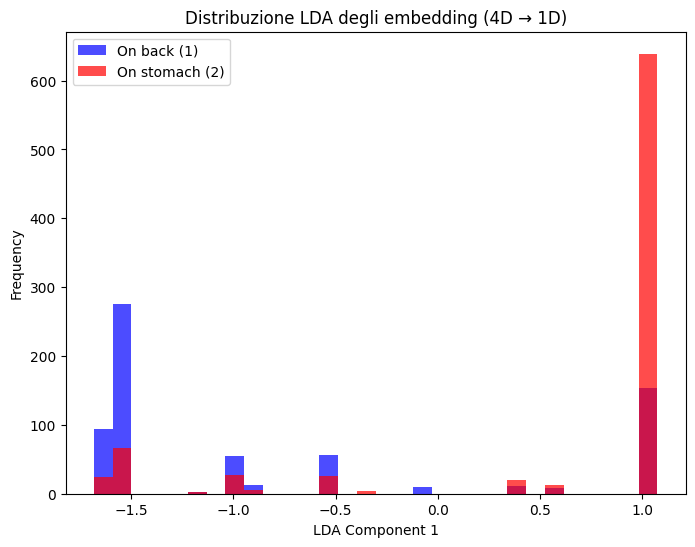

In [113]:
ret.plot_lda()

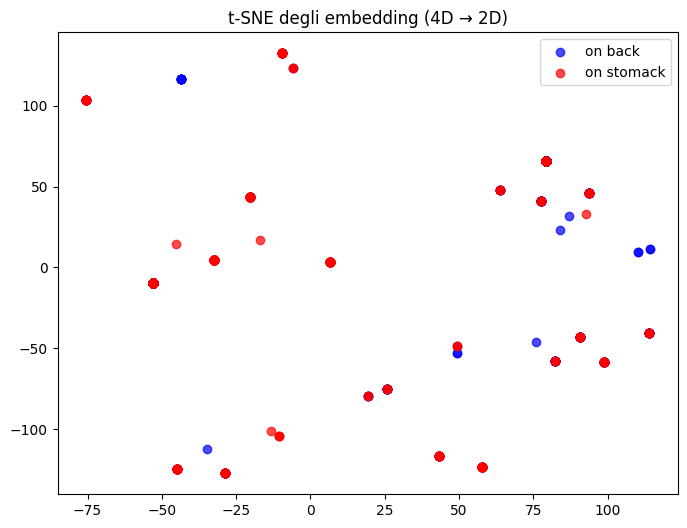

In [114]:
ret.plot_tsne()

In [115]:
ret.embeddings_norm

array([[          0,           0,           0,           0],
       [        0.5,         0.5,         0.5,         0.5],
       [          0,           0,           0,           0],
       ...,
       [          0,           0,           0,           0],
       [          0,           0,           0,           0],
       [          0,           0,           0,           0]])

In [116]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.709


# PIPELINE: model 4, embeddings all features, dataset https://universe.roboflow.com/skt/baby_posture

## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [117]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [118]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 1506 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v2
Dataset dimension: 1506
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


## 2. Extract embeddings from dataset

**Create embeddings**

In [119]:
embeddings = emb_builder.embedding_all_features()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 embedding created
------------------------------------------------------------------------------------------


In [120]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.840860,0.275490,0.060125,122.830696,147.334481,0.085138
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
3,1,1,1,1,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,0.469082,0.201713,0.158529,0.040059,87.692268,154.811363,0.004185
4,1,1,1,1,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,0.788980,0.648129,0.131284,0.039298,104.018161,136.106213,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1502,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1503,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
1504,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000


## 3. Retrieval to evaluate embedding goodness

In [122]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths)

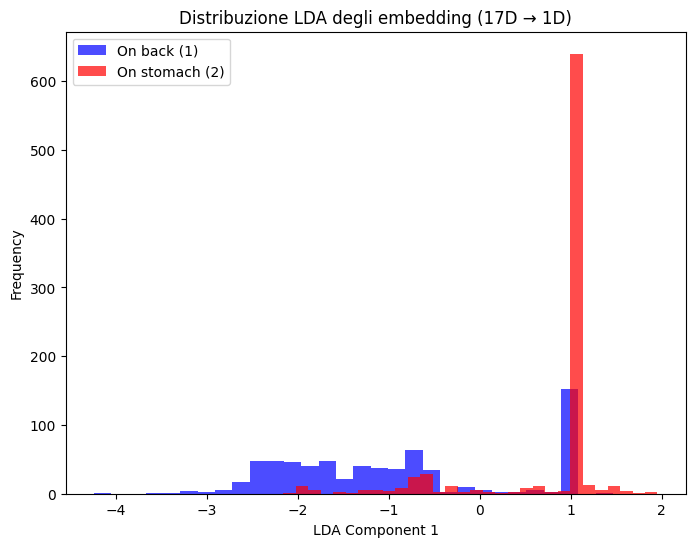

In [123]:
ret.plot_lda()

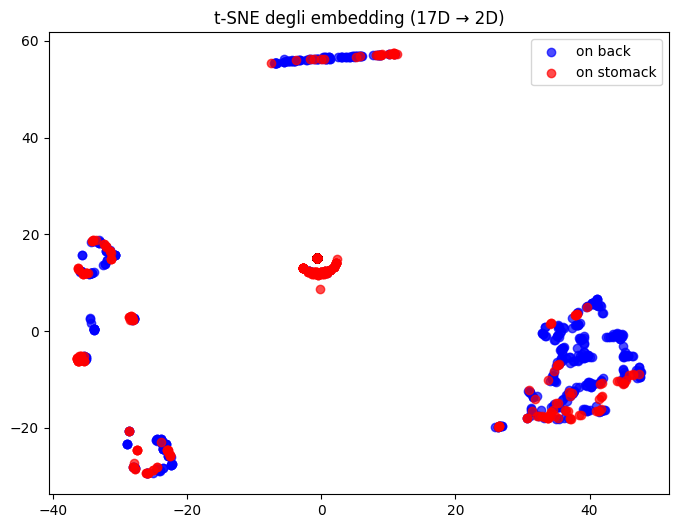

In [124]:
ret.plot_tsne()

In [125]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.698


# PIPELINE: model 4, embeddings all features norm, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [126]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2

from retrieval import ImageRetrieval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [127]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline


In [128]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 1506 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v2
Dataset dimension: 1506
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


## 2. Extract embeddings from dataset

**Create embeddings**

In [129]:
embeddings = emb_builder.embedding_all_features_norm()


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
FINISHED: 1506 embedding created


In [130]:
embeddings

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.275490,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.126908,-1.251334,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.728926
3,1,1,1,1,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,...,1.014402,1.536646,0.158529,0.397289,0.040059,0.172300,87.692268,154.811363,0.004185,0.582652
4,1,1,1,1,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,...,0.911147,0.985550,0.131284,0.496643,0.039298,0.121073,104.018161,136.106213,0.002724,1.227875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-5.460359,-6.470988,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.835754
1502,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.133202,-2.916648,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.312752
1503,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-8.516118,-1.624842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.641883
1504,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.157812,-2.335637,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.094292


## 3. Retrieval to evaluate embedding goodness

In [131]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval( embeddings, emb_builder.y, emb_builder.image_paths)

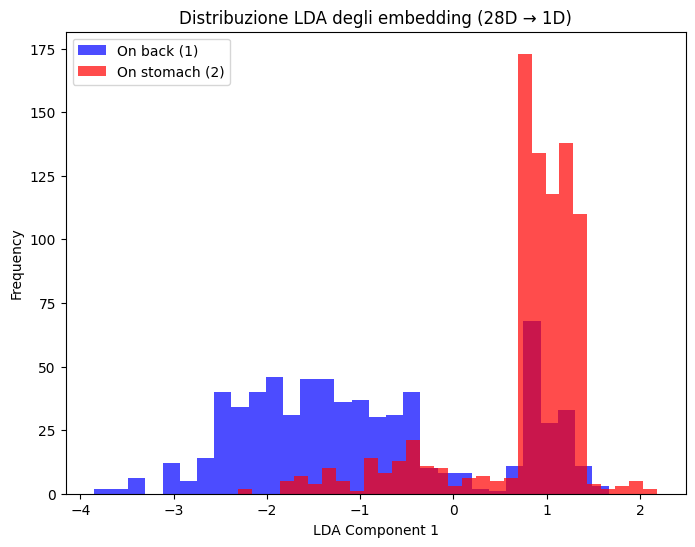

In [133]:
ret.plot_lda()

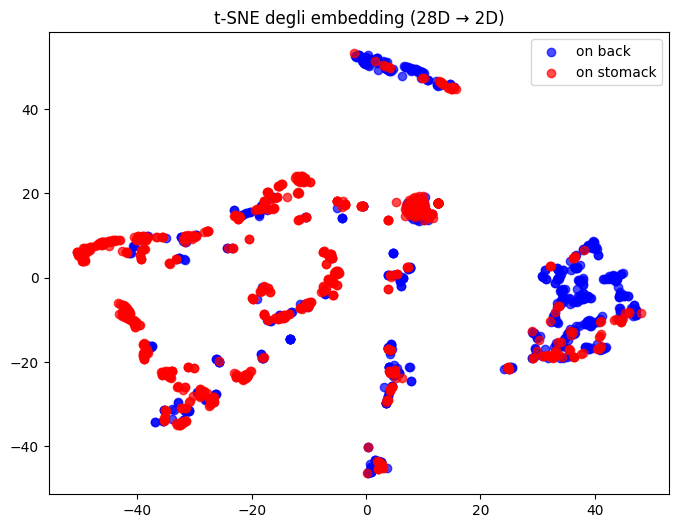

In [134]:
ret.plot_tsne()

In [135]:
ret.build_index()
ret.precision_at_k(k=10, verbose=True)

Average retrieval accuracy at 10: 0.751


In [136]:
distances, image_paths_similar = ret.retrieve_similar(idx_query=0, k=10, verbose=False)

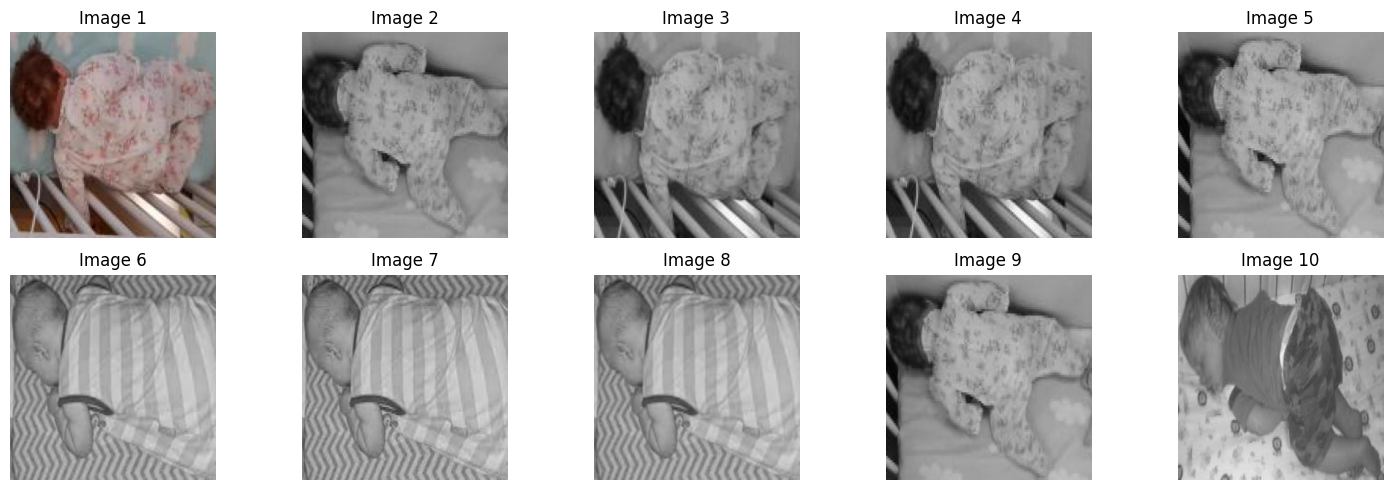

In [137]:
ret.show_images(image_paths_similar)